In [134]:
from langgraph.graph import StateGraph,MessagesState,START,END
from langchain_core.messages import SystemMessage,HumanMessage,AIMessage
from langgraph.prebuilt import tools_condition,ToolNode
from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults
from typing import Annotated,Literal
from dotenv import load_dotenv
import os

load_dotenv()

True

In [135]:
llm = ChatGroq(model_name="llama-3.2-11b-vision-preview")

In [136]:
def Mul(a: int, b: int) -> int:
    """multiply a and b
    args:
        a: first int
        b: secound int
    """
    return a * b

In [137]:
def add(a: int, b: int) -> int:
    """addition a and b
    args:
        a: first int
        b: secound int
    """
    return a + b

In [138]:
def div(a: int, b: int) -> float:
    """divition a and b
    args:
        a: first int
        b: secound int
    """
    return a / b

In [139]:
tavily = TavilySearchResults(max_results=3)

In [140]:
tool = [Mul,add,div,tavily]

In [141]:
model_with_tool = llm.bind_tools(tool)

In [142]:
sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.")

In [143]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = model_with_tool.invoke([sys_msg] + messages)
    return {'messages':[response]}

In [144]:
workflow = StateGraph(MessagesState)
workflow.add_node("Reasoner",call_model)
workflow.add_node("tools",ToolNode(tool))
workflow.add_edge(START,"Reasoner")
workflow.add_conditional_edges(
    "Reasoner",
    tools_condition
)
workflow.add_edge("tools","Reasoner")
app = workflow.compile()

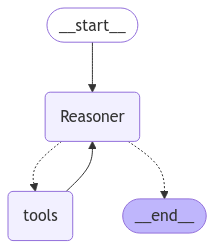

In [145]:
app

In [148]:
response = app.invoke({'messages':["what is 2 times of namerendra modi age"]})

In [150]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

what is 2 times of namerendra modi age
================================== Ai Message ==================================
Tool Calls:
  Mul (call_d74y)
 Call ID: call_d74y
  Args:
    a: 2
    b: 71
  tavily_search_results_json (call_dnk5)
 Call ID: call_dnk5
  Args:
    query: Narendra Modi age in 2024
================================= Tool Message =================================
Name: Mul

142
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.facebook.com/cnnnews18/videos/modi-at-74-age-is-just-a-number-for-indias-prime-minister/825488299789928/", "content": "Modi At 74: Age is Just A Number For India's Prime Minister CNN-News18's Aman Sharma Explains #PMModi #ModiSarkar3."}, {"url": "https://www.youtube.com/watch?v=SiM6Ze84wFo", "content": "PM Narendra Modi turns 74 today | BJP's J.P. Nadda will inaugurate the 'Seva 

In [151]:
response = app.invoke({'messages':["What is the result when you add 100 years to the current age of Elon Musk?"]})

In [152]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the result when you add 100 years to the current age of Elon Musk?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_ssnq)
 Call ID: call_ssnq
  Args:
    query: Elon Musk current age
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.myagecalculator.com/how-old-is-elon-musk", "content": "How old is Elon Musk? How old is Elon Musk? Elon Musk was born on 28 June 1971. Elon Musk is 53 years old. How old is Elon Musk in days now? Elon Musk is 53 years 6 months 5 days old. When is the next birthday of Elon Musk? Elon Musk's next birthday is in 5 months 26 days. What is the zodiac sign of Elon Musk? Zodiac sign of Elon Musk is Cancer. Born in South Africa, Elon Musk is an American businessman and innovator who became popular as the creator a